In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

C:\Users\Ryan Jewik\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Ryan Jewik\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("valorant_games.csv")

In [3]:
df['rank'].value_counts()

rank
Ascendant 1    179
Diamond 3      153
Diamond 1      126
Platinum 3     111
Gold 3          93
Diamond 2       78
Platinum 1      66
Ascendant 2     57
Platinum 2      48
Placement       24
Gold 2          24
Silver 2        17
Gold 1          17
Silver 3         7
Name: count, dtype: int64

Epoch 1/20
27/27 [==============================] - 4s 59ms/step - loss: 0.0481 - val_loss: 0.0368
Epoch 2/20
27/27 [==============================] - 1s 39ms/step - loss: 0.0152 - val_loss: 0.0123
Epoch 3/20
27/27 [==============================] - 1s 39ms/step - loss: 0.0135 - val_loss: 0.0153
Epoch 4/20
27/27 [==============================] - 1s 38ms/step - loss: 0.0129 - val_loss: 0.0116
Epoch 5/20
27/27 [==============================] - 1s 37ms/step - loss: 0.0127 - val_loss: 0.0126
Epoch 6/20
27/27 [==============================] - 1s 39ms/step - loss: 0.0123 - val_loss: 0.0140
Epoch 7/20
27/27 [==============================] - 1s 38ms/step - loss: 0.0119 - val_loss: 0.0118
Epoch 8/20
27/27 [==============================] - 1s 38ms/step - loss: 0.0115 - val_loss: 0.0116
Epoch 9/20
27/27 [==============================] - 1s 37ms/step - loss: 0.0116 - val_loss: 0.0115
Epoch 10/20
27/27 [==============================] - 1s 37ms/step - loss: 0.0107 - val_loss: 0.0137
Epoch 11/

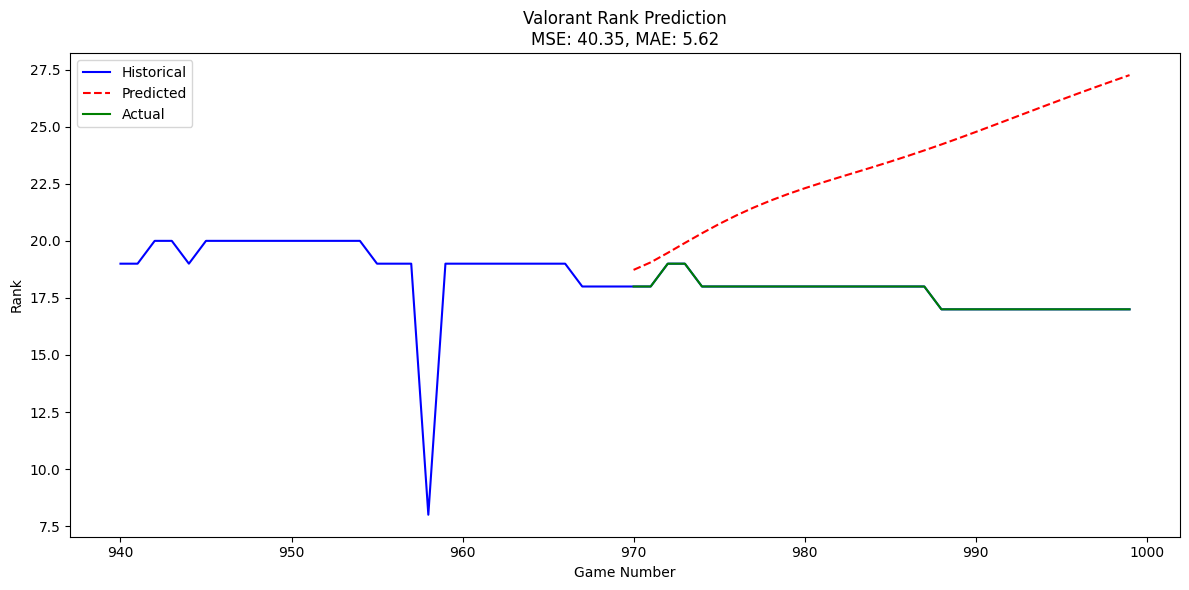


Prediction vs Actual:
Game 970: Actual: Diamond 3, Predicted: Diamond 3
Game 971: Actual: Diamond 3, Predicted: Diamond 3
Game 972: Actual: Ascendant 1, Predicted: Diamond 2
Game 973: Actual: Ascendant 1, Predicted: Diamond 2
Game 974: Actual: Diamond 3, Predicted: Diamond 2
Game 975: Actual: Diamond 3, Predicted: Diamond 2
Game 976: Actual: Diamond 3, Predicted: Diamond 2
Game 977: Actual: Diamond 3, Predicted: Diamond 2
Game 978: Actual: Diamond 3, Predicted: Diamond 2
Game 979: Actual: Diamond 3, Predicted: Diamond 2
Game 980: Actual: Diamond 3, Predicted: Diamond 2
Game 981: Actual: Diamond 3, Predicted: Diamond 2
Game 982: Actual: Diamond 3, Predicted: Diamond 2
Game 983: Actual: Diamond 3, Predicted: Diamond 2
Game 984: Actual: Diamond 3, Predicted: Diamond 2
Game 985: Actual: Diamond 3, Predicted: Diamond 2
Game 986: Actual: Diamond 3, Predicted: Diamond 2
Game 987: Actual: Diamond 3, Predicted: Diamond 2
Game 988: Actual: Diamond 2, Predicted: Diamond 2
Game 989: Actual: Diamo

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = pd.read_csv('valorant_games.csv')

rank_mapping = {
    'Iron 1': 1, 'Iron 2': 2, 'Iron 3': 3,
    'Bronze 1': 4, 'Bronze 2': 5, 'Bronze 3': 6,
    'Silver 1': 7, 'Silver 2': 8, 'Silver 3': 9,
    'Gold 1': 10, 'Gold 2': 11, 'Gold 3': 12,
    'Platinum 1': 13, 'Platinum 2': 14, 'Platinum 3': 15,
    'Diamond 1': 16, 'Diamond 2': 17, 'Diamond 3': 18,
    'Ascendant 1': 19, 'Ascendant 2': 20, 'Ascendant 3': 21,
    'Immortal 1': 22, 'Immortal 2': 23, 'Immortal 3': 24,
    'Radiant': 25,
    'Placement': 8
}

df['rank_numeric'] = df['rank'].map(rank_mapping)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

validation_games = 30  # Changed to 30 days
validation_data = df[-validation_games:]
training_data = df[:-validation_games]
data = training_data['rank_numeric'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

seq_length = 30
X, y = create_sequences(data_scaled, seq_length)

model = Sequential([
    LSTM(150, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(100, return_sequences=False),
    Dense(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

last_sequence = data_scaled[-seq_length:]
predictions = []

for _ in range(validation_games):
    current_seq = last_sequence.reshape(1, seq_length, 1)
    next_rank = model.predict(current_seq, verbose=0)
    predictions.append(next_rank[0])
    last_sequence = np.append(last_sequence[1:], next_rank)

predictions = scaler.inverse_transform(np.array(predictions))

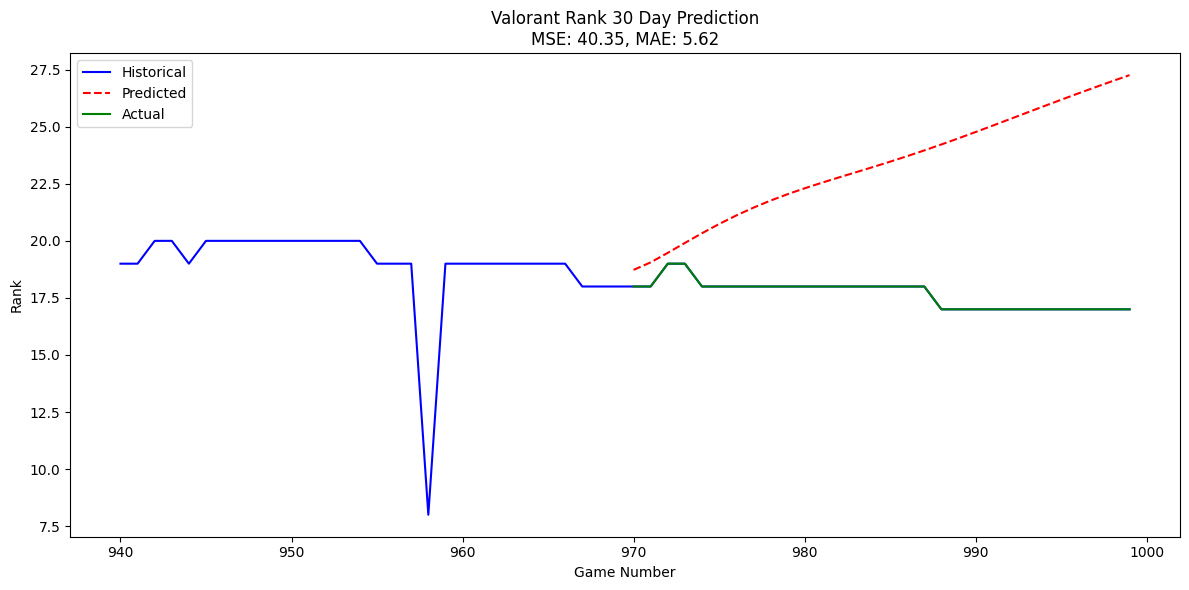


Prediction vs Actual:
Game 970: Actual: Diamond 3, Predicted: Diamond 3
Game 971: Actual: Diamond 3, Predicted: Diamond 3
Game 972: Actual: Ascendant 1, Predicted: Diamond 2
Game 973: Actual: Ascendant 1, Predicted: Diamond 2
Game 974: Actual: Diamond 3, Predicted: Diamond 2
Game 975: Actual: Diamond 3, Predicted: Diamond 2
Game 976: Actual: Diamond 3, Predicted: Diamond 2
Game 977: Actual: Diamond 3, Predicted: Diamond 2
Game 978: Actual: Diamond 3, Predicted: Diamond 2
Game 979: Actual: Diamond 3, Predicted: Diamond 2
Game 980: Actual: Diamond 3, Predicted: Diamond 2
Game 981: Actual: Diamond 3, Predicted: Diamond 2
Game 982: Actual: Diamond 3, Predicted: Diamond 2
Game 983: Actual: Diamond 3, Predicted: Diamond 2
Game 984: Actual: Diamond 3, Predicted: Diamond 2
Game 985: Actual: Diamond 3, Predicted: Diamond 2
Game 986: Actual: Diamond 3, Predicted: Diamond 2
Game 987: Actual: Diamond 3, Predicted: Diamond 2
Game 988: Actual: Diamond 2, Predicted: Diamond 2
Game 989: Actual: Diamo

In [23]:
def timeseries(df, validation_data, predictions):

    results_df = pd.DataFrame({
        'Game': validation_data.index,
        'Actual': validation_data['rank_numeric'],
        'Predicted': predictions.flatten()
    })

    mse = mean_squared_error(results_df['Actual'], results_df['Predicted'])
    mae = mean_absolute_error(results_df['Actual'], results_df['Predicted'])

    plt.figure(figsize=(12, 6))
    plt.plot(df.index[-60:], df['rank_numeric'][-60:], label='Historical', color='blue')  # Show more history
    plt.plot(results_df['Game'], results_df['Predicted'], 
             label='Predicted', linestyle='--', color='red')
    plt.plot(results_df['Game'], results_df['Actual'], 
             label='Actual', color='green')

    plt.title(f'Valorant Rank 30 Day Prediction\nMSE: {mse:.2f}, MAE: {mae:.2f}')
    plt.xlabel('Game Number')
    plt.ylabel('Rank')
    plt.legend()
    plt.tight_layout()
    plt.show()
    # Save plot to buffer
    buffer = BytesIO()
    plt.savefig(buffer, format='png', bbox_inches='tight')
    buffer.seek(0)
    image_png = buffer.getvalue()
    graph = base64.b64encode(image_png).decode('utf-8')
    buffer.close()

    # Clear the current figure
    plt.close()

    return graph

timeseries(df, validation_data, predictions)

print("\nPrediction vs Actual:")
for i, row in results_df.iterrows():
    actual_rank = list(rank_mapping.keys())[list(rank_mapping.values()).index(int(round(row['Actual'])))]
    pred_rank = list(rank_mapping.keys())[list(rank_mapping.values()).index(int(round(row['Predicted'])))]
    print(f"Game {i}: Actual: {actual_rank}, Predicted: {pred_rank}")

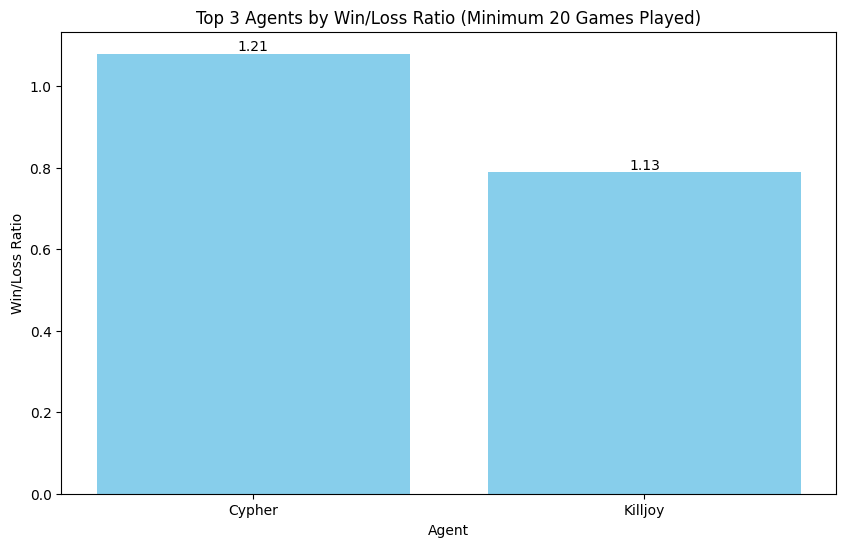

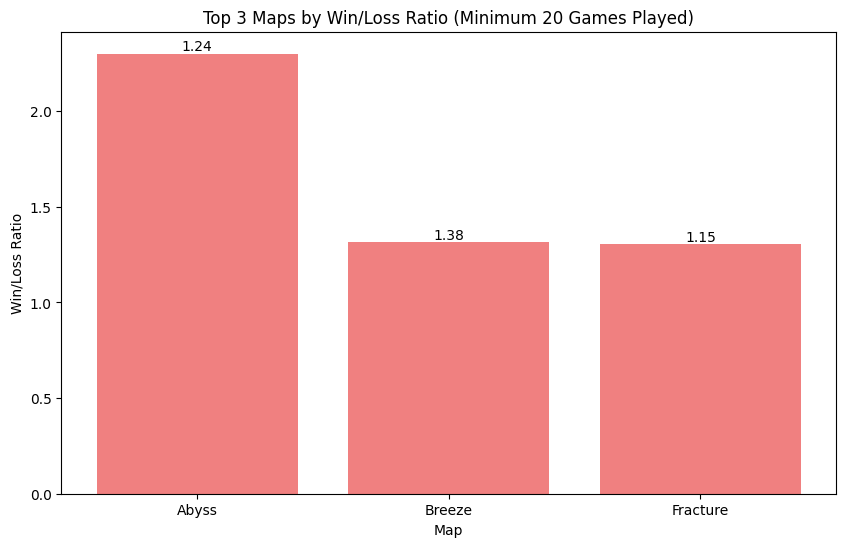

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import base64
from io import BytesIO

def get_top_agents_graph(df):
    # Calculate win/loss ratio for each agent
    df['win'] = df['outcome'].apply(lambda x: 1 if x == 'Win' else 0)
    df['loss'] = df['outcome'].apply(lambda x: 1 if x == 'Loss' else 0)

    # Group by agent and calculate total wins, losses, games played, and mean kdr
    agent_stats = df.groupby('agent').agg({'win': 'sum', 'loss': 'sum', 'kdr': 'mean'})
    agent_stats['games_played'] = agent_stats['win'] + agent_stats['loss']
    agent_stats['win_loss_ratio'] = agent_stats['win'] / agent_stats['loss']

    # Filter agents with at least 20 games played
    agent_stats = agent_stats[agent_stats['games_played'] >= 20]

    # Get top 3 agents by win/loss ratio
    top_agents = agent_stats.sort_values(by='win_loss_ratio', ascending=False).head(3)

    # Plot the results for agents
    plt.figure(figsize=(10, 6))
    bars = plt.bar(top_agents.index, top_agents['win_loss_ratio'], color='skyblue')
    plt.xlabel('Agent')
    plt.ylabel('Win/Loss Ratio')
    plt.title('Top 3 Agents by Win/Loss Ratio (Minimum 20 Games Played)')

    # Add mean kdr as text labels
    for bar, kdr in zip(bars, top_agents['kdr']):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(kdr, 2), ha='center', va='bottom')

    # Save plot to buffer
    buffer = BytesIO()
    plt.savefig(buffer, format='png', bbox_inches='tight')
    buffer.seek(0)
    image_png = buffer.getvalue()
    graph = base64.b64encode(image_png).decode('utf-8')
    buffer.close()
    plt.show()
    # Clear the current figure
    plt.close()

    return graph

def get_top_maps_graph(df):
    # Calculate win/loss ratio for each map
    df['win'] = df['outcome'].apply(lambda x: 1 if x == 'Win' else 0)
    df['loss'] = df['outcome'].apply(lambda x: 1 if x == 'Loss' else 0)

    # Group by map and calculate total wins, losses, games played, and mean kdr
    map_stats = df.groupby('map').agg({'win': 'sum', 'loss': 'sum', 'kdr': 'mean'})
    map_stats['games_played'] = map_stats['win'] + map_stats['loss']
    map_stats['win_loss_ratio'] = map_stats['win'] / map_stats['loss']

    # Filter maps with at least 20 games played
    map_stats = map_stats[map_stats['games_played'] >= 20]

    # Get top 3 maps by win/loss ratio
    top_maps = map_stats.sort_values(by='win_loss_ratio', ascending=False).head(3)

    # Plot the results for maps
    plt.figure(figsize=(10, 6))
    bars = plt.bar(top_maps.index, top_maps['win_loss_ratio'], color='lightcoral')
    plt.xlabel('Map')
    plt.ylabel('Win/Loss Ratio')
    plt.title('Top 3 Maps by Win/Loss Ratio (Minimum 20 Games Played)')

    # Add mean kdr as text labels
    for bar, kdr in zip(bars, top_maps['kdr']):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(kdr, 2), ha='center', va='bottom')

    # Save plot to buffer
    buffer = BytesIO()
    plt.savefig(buffer, format='png', bbox_inches='tight')
    buffer.seek(0)
    image_png = buffer.getvalue()
    graph = base64.b64encode(image_png).decode('utf-8')
    buffer.close()
    plt.show()
    # Clear the current figure
    plt.close()

    return graph

# Example usage
df = pd.read_csv('valorant_games.csv')
agent_graph = get_top_agents_graph(df)
map_graph = get_top_maps_graph(df)

In [16]:
df.head()

,game_id,episode,act,rank,date,agent,map,outcome,round_wins,round_losses,...,deaths,assists,kdr,avg_dmg_delta,headshot_pct,avg_dmg,acs,num_frag,win,loss
0,1,6,2,Placement,4/11/2023,Cypher,Ascent,Loss,5,13,...,15,4,0.5,-61,3,76,125,3,0,1
1,2,6,2,Placement,4/12/2023,Cypher,Icebox,Loss,4,13,...,15,2,0.2,-124,22,42,59,5,0,1
2,3,6,2,Placement,4/15/2023,KAY/O,Lotus,Win,13,4,...,12,7,0.6,-46,2,87,132,5,1,0
3,4,6,2,Placement,4/15/2023,Brimstone,Ascent,Loss,9,13,...,12,10,1.5,23,14,137,230,2,0,1
4,5,6,2,Placement,4/15/2023,Cypher,Haven,Loss,1,13,...,14,3,0.4,-75,7,90,146,4,0,1


In [17]:
df.columns

Index(['game_id', 'episode', 'act', 'rank', 'date', 'agent', 'map', 'outcome',
       'round_wins', 'round_losses', 'kills', 'deaths', 'assists', 'kdr',
       'avg_dmg_delta', 'headshot_pct', 'avg_dmg', 'acs', 'num_frag', 'win',
       'loss'],
      dtype='object')

In [18]:
df['num_frag'].value_counts()

num_frag
2    225
4    209
3    207
5    181
1    178
Name: count, dtype: int64